<h1><center>Homework 4 - Classify the Hand-written Digits Dataset</center></h1>

![MNIST Hand-written Digits](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

## Introduction

So far we have been using scikit-learn library to train linear regression and logistic regression models. The 4-step modeling process (import, instance, fit, predict) comes with scikit-learn is very handy to code any machine learning models. 

In this homework, we will use both Linear Regression and Logistic Regression to predict digit labels based on hand-written digit images. Think carefully what kind of modeling task this homework is about (e.g., regression, classification, clustering, etc.) and explain why one of the model is not going to work very well. 

MNIST ("Modified National Institute of Standards and Technology") show above is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The MNIST dataset contains a bunch of hand-written digits in the number range of 0 ~ 9 in a pixelated image format. The goal is to train a machine learning model so that it can be used to predict an image label (labels 0–9) given any hand-written image.

The dataset we are going to use is a toy dataset (simplified digits dataset) derived from [MNIST dataset](http://yann.lecun.com/exdb/mnist/). This toy dataset contains 1797 of 8x8 pixelated hand-written digits in the categories from 0 to 9. 

#### Note: the last the question needs to use a famous Computer Vision library named `OpenCV`. Please run the following command to install the package in your Anaconda environment. This step will take more than 5 minutes to complete on some systems. 

> ```conda install -c conda-forge opencv```


## Q1: Load the data

#### Import the necessary libaries. We will hold on to the sklearn libraries for now and import it later. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### We are going to use the built-in digits dataset from sklearn that does not require the `read_csv()` function. 

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()

#### Note that the `load_digits()` function returns back a dictionary. Let's explore the dictionary a bit by printing out the dataset description and checking out the keys and the shapes

In [32]:
# Check out all the keys of the dictionary.
digits.keys()



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [71]:
digits['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [33]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
# Print out the descriptions of the dataset by supplying the 'DESCR' key to the dictionary. 
print(digits['DESCR'])



.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
# Print to show the dimensions of the data

print("Image Data Shape" ,digits['data'].shape)

Image Data Shape (1797, 64)


In [36]:
# Print to show the dimensions of the target labels

print("Label Data Shape",digits['target'].shape)

Label Data Shape (1797,)


## Q2: Create a DataFrame and conduct basic statistical analysis.

#### Create a DataFrame named `digits_df` with all the feature columns from the `digits` dictionary.

In [37]:
# Create a DataFrame with all the feature columns

digits_df = pd.DataFrame(data=digits['data'], columns=digits['feature_names'])


#### Add a new column named `target` that contains all the labels given by the `digit` dictionary.

In [38]:
# Now add the 'target' (label) column to the DataFrame

digits_df['target'] = digits['target']


#### Show the top 5 rows of the generated DataFrame `digit_df`.

In [39]:
# Show the first 5 rows out of the DataFrame
digits_df.head()



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


#### Find the basic statistics of the first 10 columns of the DataFrame.

In [40]:
digits_df.describe()



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


## Q3: Basic EDA

#### Use Seaborn to recreate the following plot. It looks like the labels are very well balanced.

<AxesSubplot:xlabel='target', ylabel='count'>

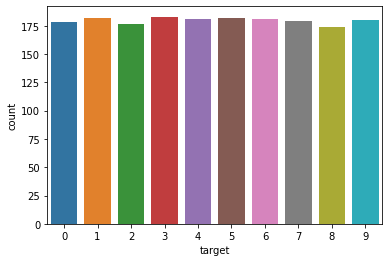

In [41]:
sns.countplot(data=digits_df, x='target')



#### Plot the histograms of the $0-th$, $10-th$, $20-th$, and $30-th$ pixel from each image on a 1x4 subplot. What interesting observation you can make?

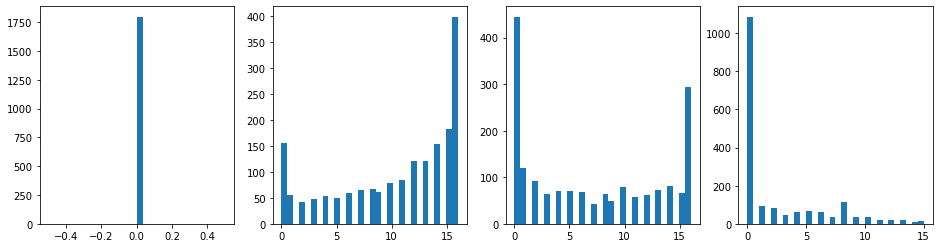

In [42]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (16,4))

for i in range(4):
    axs[i].hist(x=digits_df.iloc[:, i*10], bins=30)
    


## Q4: Plot a single digit image

#### This dataset is different than any other datasets we've seen so far. Each column in this DataFrame is actually a pixel in grayscale. To understand this, let's try to plot the image of the first digit from our DataFrame.

#### Step 1: grab the first row (index 0) and columns of 0 - 63 from the DataFrame. This is the image data for the first digit from the dataset. Note the last column should be excluded since it is the label column.

In [43]:
# Step 1: grab the first row (index 0) and columns of 0 - 63 from the DataFrame. 
# This is going to be the image data for the first digit. The last column should be excluded.
image = digits_df.iloc[0, 0:-1]


image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

#### Step 2: Note that you got a Series from Step 1. Now reshape the Series into a $8*8$ numpy matrix by using the `np.reshape()` method.

In [44]:
# Step 2: Note that you got a Series from Step 1. 
# Now reshape the Series into a 8x8 numpy matrix by using np.reshape() method
image_mat = np.reshape(image.values, (8,8))


image_mat

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Step 3: use plt.imshow() method to plot the image_mat matrix. Ensure your color map argument `cmap` of the plot is set to grayscale color by using `cmp = plt.cm.gray`.

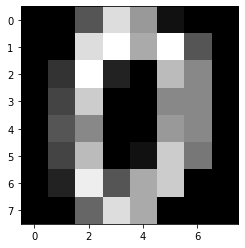

In [81]:
# Step 3: use plt.imshow() method to plot the image_mat matrix.
# Make sure your color map of the plot is set to grayscale by using plt.cm.gray

plt.imshow(image_mat, cmap = plt.cm.gray)

## Q5: Display the images and labels together

#### Good job. Now that you understand how to plot a single digit, let's go ahead and plot the first 10 digits from the DataFrame into a $2*5$ grid. This time, you also need plot the title for each image with the label of that digit.

In [79]:
image_mat

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

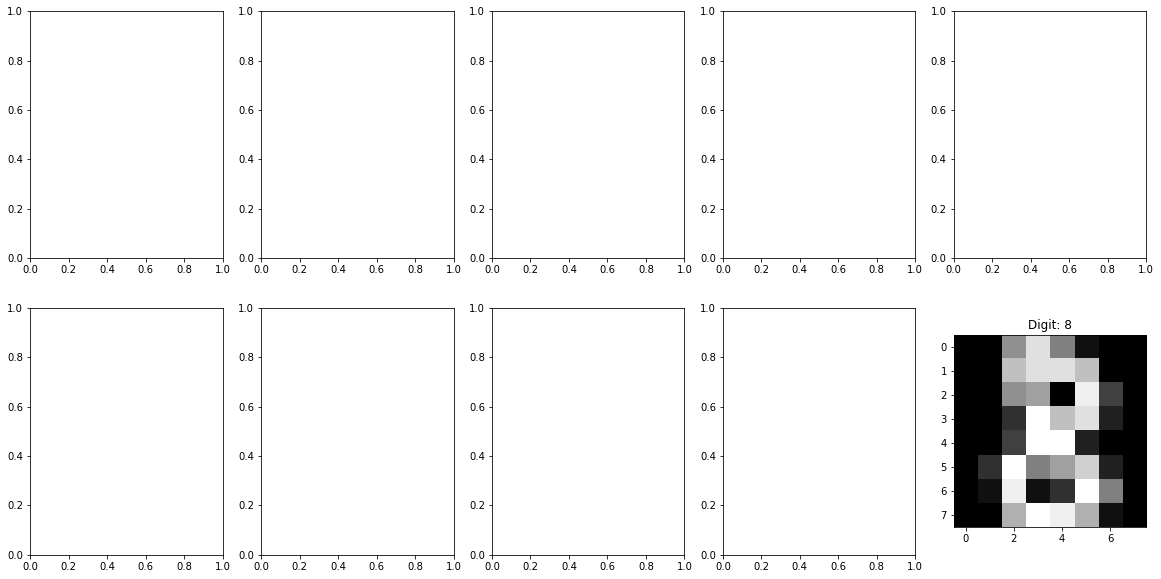

In [86]:
fig, axs = plt.subplots(nrows=2, ncols = 5, figsize=(20,10))

for i in range(9):
    for j in range(9):
        plt.imshow(np.reshape(digits_df.iloc[i, 0:-1].values, (8,8)), cmap = plt.cm.gray)
        plt.title("Digit: {}".format(i))



## Q6: Data Splitting and Normalization.

#### Split the entire DataFrame into the training part and the test part. Set the testing size as 30% and use random seed as 101.

In [47]:
# Import the functions that you need
from sklearn.model_selection import train_test_split


In [48]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(digits_df.drop('target', axis=1), digits_df['target'], test_size=0.3, random_state=101)





#### Employ the MinMaxScaler ([reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) the scale the `X_train` and `X_test` data. 

__Note:__ the scaler object only needs to be trained once with the `X_train` data. The trained scaler can be used to transform the `X_test` data too. 

In [49]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [50]:
# Create the scaler object, 
# train the scaler with X_train, 
# and transform X_train

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)


# Show X_train
X_train_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.875 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.3125, 0.    ],
       ...,
       [0.    , 0.    , 0.25  , ..., 0.5   , 0.    , 0.    ],
       [0.    , 0.    , 0.3125, ..., 1.    , 0.75  , 0.0625],
       [0.    , 0.    , 0.    , ..., 0.75  , 0.    , 0.    ]])

In [51]:
# Transform and show X_test

X_test_scaled = scaler.transform(X_test)


X_test_scaled

array([[0.    , 0.    , 0.25  , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.75  , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 1.    , 0.875 , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.625 , 0.    , 0.    ]])

## Q7: Model Training and Prediction.

#### Use the NORMALIZED training data to train a Linear Regression model and get the predicted results.

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)






#### Evaluate the effectiveness of the model with explained variance and $R^2$ score.

In [53]:
from sklearn.metrics import explained_variance_score, r2_score
print('Explained Vairance Score: ', explained_variance_score(y_test, predictions) )
print('R2 Score: ',r2_score(y_test, predictions) )




ValueError: Found input variables with inconsistent numbers of samples: [540, 1257]

#### Well, the scores look pretty bad. Explain why the Linear Regression model is not a good choice.

In [91]:
# Write your answer here.
#because the data is discrete



## Q8: This time, train a Logistic Regression Model

#### Use the NORMALIZED training data to train a Logistic Regression model and get the predicted results. Ensure to use the `liblinear` solver for the model. 

In [54]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(solver='liblinear')
lmodel.fit(X_train, y_train)
predictions = lmodel.predict(X_test)




#### To evaluate the effectiveness of a Logistic Regression model, let's study the confusion matrix and the classification report. 

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



[[53  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  1  0  0  1  0  1  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  2  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 57  0  1  1  0]
 [ 0  0  0  0  0  0 45  0  1  0]
 [ 0  0  0  0  2  0  0 54  0  0]
 [ 0  1  0  1  0  0  0  0 55  2]
 [ 0  0  0  0  0  0  0  1  2 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.95      0.95        55
           2       1.00      1.00      1.00        49
           3       0.96      1.00      0.98        54
           4       0.97      0.97      0.97        61
           5       1.00      0.97      0.98        59
           6       0.98      0.98      0.98        46
           7       0.96      0.96      0.96        56
           8       0.92      0.93      0.92        59
           9       0.96      0.94      0.95        48

    accuracy                           0.97       540
   macro avg       

#### Congratulations, the F1 score is nearly 1 - that's a very good Logistic Regression model!

## Q9: Confusion matrix visualizaiton

#### One more step before you can report this great news to your boss: let's use Seaborn to create a heatmap for the confusion matrix. Make sure your x-axis label is 'Predicted Digits', y-axis label is 'Actual Digits', and the title of the heatmap is 'Confusion Matrix'. Keep the annotations in the heatmap. 

Text(0.5, 1.0, 'Confusion Matrix')

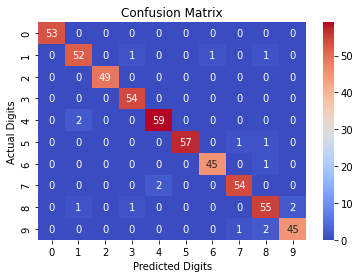

In [88]:
# Use seaborn to plot the heatmap
sns.heatmap(data = confusion_matrix(y_test, predictions), annot=True, cmap='coolwarm')


plt.ylabel('Actual Digits')
plt.xlabel('Predicted Digits')
plt.title('Confusion Matrix')

## Q10: Make an Application

#### Making an application out of your learned model is the most exciting part of machine learning! Here, we need to use a computer vision library named `opencv` to load a bigger image (28x28) given by Dr. Li, crop, resize, flatten and normalize the image, so that we can feed the image to our Logistic Regression model to get a prediction on the label. 

#### Note: you need to placed the test image `test_5.jpeg` in the same directory of this notebook.

In [89]:
import cv2

# Read in the test image
img = cv2.imread('test_5.jpeg', cv2.IMREAD_UNCHANGED)
 
# Show the original dimension of the image
print('Original Dimensions : ',img.shape)

# Display the image
plt.imshow(img, cmap = plt.cm.gray)

ModuleNotFoundError: No module named 'cv2'

#### Notice there is an unwanted bounding box on the image. We need to crop the image to get the Region of Interest (ROI). Use Numpy slicing and indexing to limit the row indices to 5 ~ 24 (inclusive), and the column indices to 5 ~ 24 (inclusive).

In [90]:
# Crop the ROI
img_roi = img[5:25, 5:25]




# Show the dimension of the ROI
print('ROI Dimensions : ',img_roi.shape)

# Display the image
plt.imshow(img_roi, cmap = plt.cm.gray)

NameError: name 'img' is not defined

#### The ROI image has larger resolution ($20x20$) than the images from the given dataset. So we need to resize the image to be $8x8$.

Resized Dimensions :  (8, 8)


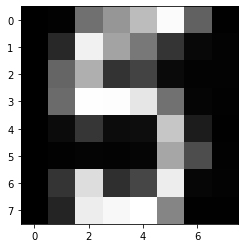

In [30]:
# Resize the ROI image
img_resize = cv2.resize(img_roi, (8,8), interpolation = cv2.INTER_AREA)

# Show the dimension of the resized image
print('Resized Dimensions : ', img_resize.shape)

# Display the image
plt.imshow(img_resize, cmap = plt.cm.gray)

#### Since our Logistic Regression model takes $8*8 = 64$ pixels on a single row from the dataset as the features, we need to flatten the resized image so that it becomes a single row vector.  

Flattend Dimensions :  (1, 64)


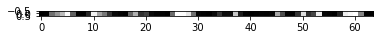

In [31]:
# Use reshape() method to flatten the image. 
flatten = np.reshape(img_resize, (1,64))




# Show the dimension of the flatten image
print('Flattend Dimensions : ',flatten.shape)

# Display the image
plt.imshow(flatten, cmap = plt.cm.gray)

#### Lastly, we need to normalize the flattened image as you did for `X_train` and `X_test`, then make a prediction using the trained Logistic Regression model.

In [87]:
fs_image = scaler.transform(flatten)
prediction = lmodel.predict(fs_image)

print('The Predicted number is: ', prediction)






NameError: name 'flatten' is not defined

# Great job and congratulations! You just made the first computer vision application based off of a machine learning model. The steps in this homework also serve as a good template for your own final project.